# Evaluación Final del Módulo 3

In [177]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np


# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # establece el estilo del fondo de las gráficas como "whitegrid". Las gráficas tendrán un fondo blanco con líneas de cuadrícula horizontales y verticales.
sns.set_theme(style="dark") # cambiará el esquema de colores predeterminado de Seaborn a uno más oscuro, adecuado para gráficas con fondos claros. 
plt.style.use('Solarize_Light2')# establece el estilo en Solarize_Lihgt2. 

# Realizar los distintos test
# ------------------------------------------------------------------------------
from scipy import stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway, fligner
from sklearn.linear_model import LinearRegression

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [178]:
df1 = pd.read_csv("Customer_Flight_Activity.csv", index_col=0)
df1.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0


In [179]:
df2 = pd.read_csv("Customer_Loyalty_History.csv", index_col=0)
df2.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [180]:
#Prefiero unir primero para no tener que explorar por separado, sabiendo el nombre de las columnas, ya me vale para saber cómo quiero hacerlo

In [181]:
#Uno por la columna común que es la primera
df= pd.merge(df2, df1, left_index=True, right_index=True, how = 'inner')

# Fase 1: Exploración y limpieza

In [182]:
df.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0,0


In [183]:
df.sample(10)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
370877,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,60758.0,Married,Star,6727.62,Standard,2015,8,NaN,NaN,2018,12,0,0,0,0,0.0,0,0
925254,Canada,Quebec,Montreal,H2T 9K8,Male,College,NaN,Single,Star,6423.74,Standard,2014,9,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
332225,Canada,Quebec,Quebec City,G1B 3L5,Male,Master,128111.0,Single,Nova,2959.95,Standard,2017,3,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
335365,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,54969.0,Married,Star,6685.80,Standard,2013,10,NaN,NaN,2017,12,3,0,3,1971,197.0,0,0
100644,Canada,Alberta,Peace River,T9O 2W2,Female,Master,94440.0,Divorced,Star,4458.11,Standard,2015,7,NaN,NaN,2017,10,0,0,0,0,0.0,0,0
428919,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,58209.0,Divorced,Star,4139.90,Standard,2015,7,NaN,NaN,2017,12,10,5,15,4425,442.0,0,0
625621,Canada,Ontario,Toronto,P1W 1K4,Female,Bachelor,70746.0,Married,Aurora,6225.02,Standard,2015,1,NaN,NaN,2018,4,0,0,0,0,0.0,0,0
252341,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,52779.0,Married,Aurora,4967.54,Standard,2013,5,NaN,NaN,2018,3,14,0,14,1232,184.5,0,0
329162,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,87842.0,Single,Star,2472.23,Standard,2012,12,NaN,NaN,2018,1,0,0,0,0,0.0,0,0


In [184]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

df.shape

El número de filas que tenemos es 405624, y el número de columnas es 24


(405624, 24)

In [185]:
#Saco la lista de columnas para verlas en vertical

df.columns.tolist()

['Country',
 'Province',
 'City',
 'Postal Code',
 'Gender',
 'Education',
 'Salary',
 'Marital Status',
 'Loyalty Card',
 'CLV',
 'Enrollment Type',
 'Enrollment Year',
 'Enrollment Month',
 'Cancellation Year',
 'Cancellation Month',
 'Year',
 'Month',
 'Flights Booked',
 'Flights with Companions',
 'Total Flights',
 'Distance',
 'Points Accumulated',
 'Points Redeemed',
 'Dollar Cost Points Redeemed']

In [186]:
# Modifico título de columnas para que no haya espacios para mejor lectura
columnas = [col.replace(" ", "_") for col in df.columns]
df.columns = columnas
df.head()

,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,2,2,2,4,1320,132.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2018,10,6,4,10,3110,311.0,385,31
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,4,4,0,4,924,92.0,0,0
100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN,2017,5,0,0,0,0,0.0,0,0


In [187]:
#Saco las estadísticas de las columnas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment_Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment_Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation_Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation_Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights_Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights_with_Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00


In [188]:
df.describe(include=object).T

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal_Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital_Status,405624,3,Married,235800
Loyalty_Card,405624,3,Star,184224
Enrollment_Type,405624,2,Standard,382200


In [189]:
df.isnull().sum()

Country                             0
Province                            0
City                                0
Postal_Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital_Status                      0
Loyalty_Card                        0
CLV                                 0
Enrollment_Type                     0
Enrollment_Year                     0
Enrollment_Month                    0
Cancellation_Year              355560
Cancellation_Month             355560
Year                                0
Month                               0
Flights_Booked                      0
Flights_with_Companions             0
Total_Flights                       0
Distance                            0
Points_Accumulated                  0
Points_Redeemed                     0
Dollar_Cost_Points_Redeemed         0
dtype: int64

In [190]:
df.duplicated().sum()

1864

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      405624 non-null  object 
 1   Province                     405624 non-null  object 
 2   City                         405624 non-null  object 
 3   Postal_Code                  405624 non-null  object 
 4   Gender                       405624 non-null  object 
 5   Education                    405624 non-null  object 
 6   Salary                       302952 non-null  float64
 7   Marital_Status               405624 non-null  object 
 8   Loyalty_Card                 405624 non-null  object 
 9   CLV                          405624 non-null  float64
 10  Enrollment_Type              405624 non-null  object 
 11  Enrollment_Year              405624 non-null  int64  
 12  Enrollment_Month             405624 non-null  int64  

In [192]:
df["Salary"].value_counts().sum()

302952

In [193]:
# Hay valores negativos, vamos a pasarlos a nulos. 
#Pero antes vamos a comprobar los nulos para ver que esos se sumen

In [194]:
df["Salary"].isnull().sum()
#102672

102672

In [195]:
#Salary tiene números negativos. Los pasamos a nulos

df["Salary"] = df["Salary"].mask(df["Salary"] < 0, None)


In [196]:
#Comprobamos que haya más nulos que antes
df["Salary"].isnull().sum()
#103152 sí hay más que antes, eso es que ha funcionado

103152

In [197]:
mediana_Salary = df['Salary'].median()
df['Salary'].fillna(mediana_Salary, inplace=True)

In [198]:
df["Salary"].isnull().sum()

0

In [199]:
df["Salary"].value_counts().sum()

405624

In [200]:
# Ahora el value_count nos da más valores porque los nulos ya son valores guays

Voy con la siguiente columna: **Cancellation_Year**

In [201]:
df["Cancellation_Year"].value_counts().sum()

50064

In [202]:
df["Cancellation_Year"].isnull().sum()

355560

In [203]:
#Miro la cantidad de valores de otra columna sin nulos para cvevr cuánto sería el total 
df["Enrollment_Month"].value_counts().sum()

405624

In [204]:
# Convierto los nulos a 0 para eliminar los nulos. Es decir:

# LEYENDA: 0 significa que no se ha dado de baja 
df["Cancellation_Year"].fillna(0, inplace=True)


In [205]:
df["Cancellation_Year"].isnull().sum()

0

In [206]:
df["Cancellation_Year"].value_counts().sum()

405624

Seguimos con Cancellation_Month

In [207]:
df["Cancellation_Month"].value_counts().sum()

50064

In [208]:
df["Cancellation_Month"].isnull().sum()

355560

In [209]:
df["Cancellation_Month"].fillna(0, inplace=True)


In [210]:
df["Cancellation_Month"].value_counts().sum()

405624

In [211]:
df["Cancellation_Month"].isnull().sum()

0

In [212]:
df.isnull().sum()

Country                        0
Province                       0
City                           0
Postal_Code                    0
Gender                         0
Education                      0
Salary                         0
Marital_Status                 0
Loyalty_Card                   0
CLV                            0
Enrollment_Type                0
Enrollment_Year                0
Enrollment_Month               0
Cancellation_Year              0
Cancellation_Month             0
Year                           0
Month                          0
Flights_Booked                 0
Flights_with_Companions        0
Total_Flights                  0
Distance                       0
Points_Accumulated             0
Points_Redeemed                0
Dollar_Cost_Points_Redeemed    0
dtype: int64

Ya no tenemos nulos. Vamos a por los duplicados

In [213]:
df.duplicated().sum()

1864

In [214]:
columnas_con_duplicados = df[df.duplicated(keep=False)].columns.tolist()
columnas_con_duplicados

['Country',
 'Province',
 'City',
 'Postal_Code',
 'Gender',
 'Education',
 'Salary',
 'Marital_Status',
 'Loyalty_Card',
 'CLV',
 'Enrollment_Type',
 'Enrollment_Year',
 'Enrollment_Month',
 'Cancellation_Year',
 'Cancellation_Month',
 'Year',
 'Month',
 'Flights_Booked',
 'Flights_with_Companions',
 'Total_Flights',
 'Distance',
 'Points_Accumulated',
 'Points_Redeemed',
 'Dollar_Cost_Points_Redeemed']

In [215]:
# No hay duplicados en Loyalty Number así que todo bien

Vamos con los tipos de dato

In [216]:
df.dtypes

Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year              float64
Cancellation_Month             float64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

In [217]:
df.sample(15)

,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
266284,Canada,Ontario,Kingston,M9K 2P4,Female,College,73523.0,Single,Nova,4250.28,Standard,2017,5,0.0,0.0,2017,6,0,0,0,0,0.00,0,0
394454,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,101352.0,Married,Star,3808.12,Standard,2014,12,0.0,0.0,2018,2,9,5,14,2772,299.16,0,0
922665,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,81237.0,Married,Aurora,5424.26,Standard,2015,11,2016.0,6.0,2018,7,0,0,0,0,0.00,0,0
714944,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,73523.0,Single,Nova,7636.28,Standard,2016,8,0.0,0.0,2017,1,0,0,0,0,0.00,0,0
511573,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,53452.0,Married,Star,2480.53,Standard,2016,8,0.0,0.0,2017,7,7,2,9,1629,162.00,0,0
356618,Canada,Yukon,Whitehorse,Y2K 6R0,Female,Bachelor,52975.0,Single,Aurora,6612.62,Standard,2014,3,0.0,0.0,2017,8,0,0,0,0,0.00,0,0
895560,Canada,Alberta,Calgary,T3E 2V9,Female,High School or Below,80919.0,Single,Star,2453.57,Standard,2015,3,0.0,0.0,2018,5,9,0,9,2367,236.00,0,0
752548,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,90311.0,Married,Star,5017.85,Standard,2017,5,2018.0,8.0,2018,10,0,0,0,0,0.00,0,0
325268,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,91480.0,Divorced,Nova,4347.59,Standard,2013,3,0.0,0.0,2017,9,0,0,0,0,0.00,0,0


In [218]:
# Vemos que Cancellation_Year y Cancellation_Month son float sin necesidad de decimales , los demás están bien

In [219]:

df["Cancellation_Year"] = df["Cancellation_Year"].astype(int)
df["Cancellation_Month"] = df["Cancellation_Month"].astype(int)


In [220]:
df.dtypes

Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
CLV                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year                int64
Cancellation_Month               int64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_with_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
dtype: object

# Fase 2: Visualización

1. Distribución de vuelos reservados mes durante el año

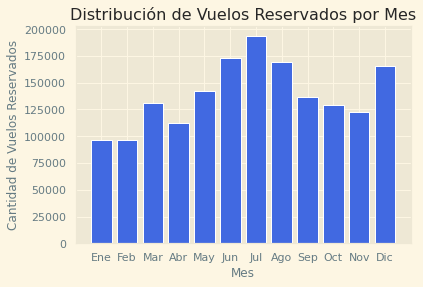

In [221]:
# Asegúrate de que 'Year' y 'Month' estén en formato de fecha (si no lo están)
df['FechaReserva'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Crea una nueva columna 'MesReserva' que represente el mes de cada reserva
df['MesReserva'] = df['FechaReserva'].dt.month

# Agrupa por mes y suma la cantidad de vuelos reservados en cada mes
reservas_por_mes = df.groupby('MesReserva')['Flights_Booked'].sum()

# Creo la gráfica de barras con nombres bonitos
plt.bar(reservas_por_mes.index, reservas_por_mes.values, color='royalblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Vuelos Reservados')
plt.title('Distribución de Vuelos Reservados por Mes')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.show()

In [222]:
# Conclusión: verano y navidad la gente viaja más

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

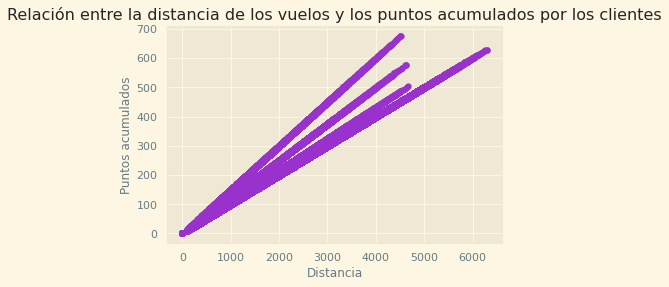

In [223]:
plt.scatter(df["Distance"], df["Points_Accumulated"],linewidth=0.25, color="darkorchid")

# Agregar un título al gráfico
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados por los clientes")

# Agregar etiquetas al eje x
plt.xlabel("Distancia")

# Agregar etiquetas al eje y
plt.ylabel("Puntos acumulados")

# Mostrar el gráfico
plt.show()


In [224]:
# Podemos ver cómo a más distancia, más puntos se acumulan

3. ¿Cuál es la distribución de los clientes por provincia o estado?

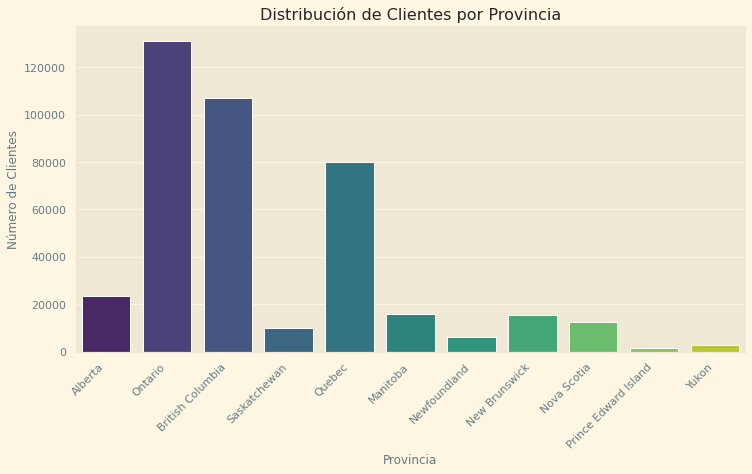

In [225]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Province', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.show()


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

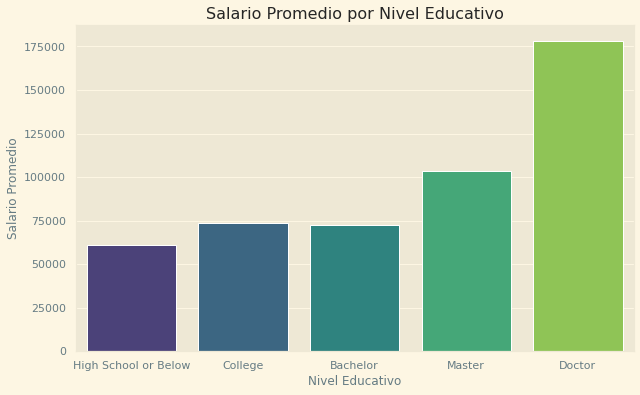

In [226]:
# Definir el orden deseado de las categorías
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

# Calcular el salario promedio por nivel educativo
average_salary_by_education = df.groupby('Education')['Salary'].mean().reindex(education_order).reset_index()

# Crear un gráfico de barras para comparar el salario promedio por nivel educativo
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Salary', data=average_salary_by_education, order=education_order, palette='viridis')
plt.title('Salario Promedio por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.show()


In [227]:
# A mayor nivel educativo, un mayor salario, aunque Collegue y Bachelor desciende un poco

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

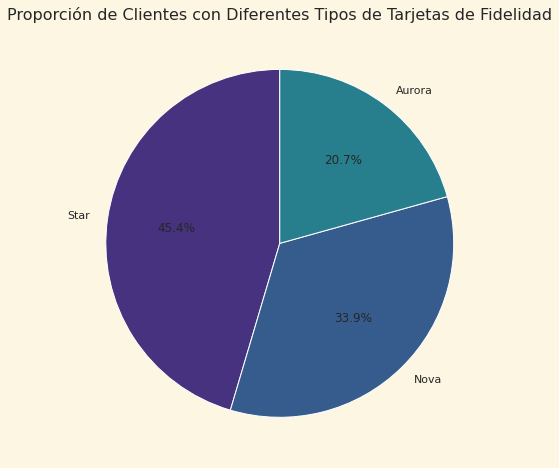

In [228]:

# Calcular la proporción de clientes con diferentes tipos de tarjetas de fidelidad
loyalty_card_counts = df['Loyalty_Card'].value_counts(normalize=True)

# Crear un gráfico de torta para visualizar la proporción
plt.figure(figsize=(8, 8))
loyalty_card_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Proporción de Clientes con Diferentes Tipos de Tarjetas de Fidelidad')
plt.ylabel('')  # Eliminar la etiqueta del eje y
plt.show()


6. ¿Cómo se distribuyen los clientes según su estado civil y género?

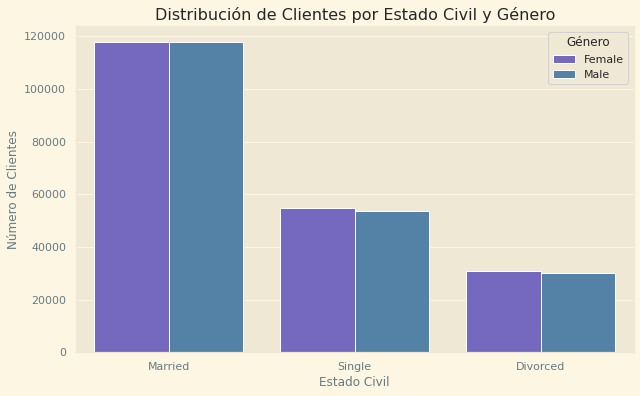

In [229]:

# Definir colores para cada género
gender_colors = {'Male': 'steelblue', 'Female': 'slateblue'}

# Crear un gráfico de barras apiladas para la distribución de clientes por estado civil y género
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', hue='Gender', data=df, palette=gender_colors)
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.legend(title='Género')
plt.show()


In [230]:
# Podemos ver que hay muchos más casados que solteros o divorciados

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [231]:
# Voy a usar las columnas 'Flights_Booked' y 'Education'.

In [232]:
df["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [233]:
df["Flights_Booked"].unique()

array([ 3,  2,  6,  4,  0, 10,  9, 13,  1, 14,  7,  5, 11, 17,  8, 15, 12,
       16, 20, 18, 19, 21])

1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [234]:
# Creo un df nuevo 
df3 = df[['Flights_Booked', 'Education']]
df3

,Flights_Booked,Education
Loyalty Number,,
100018,3,Bachelor
100018,2,Bachelor
100018,6,Bachelor
100018,4,Bachelor
100018,0,Bachelor
...,...,...
999986,15,Bachelor
999986,0,Bachelor
999986,6,Bachelor


In [235]:
df3['Education_Category'] = df['Education'].apply(lambda x: 'Graduate or below' if x in ['High School or Below', 'College', 'Bachelor'] else 'Postgraduate')
df3.sample(10)

,Flights_Booked,Education,Education_Category
Loyalty Number,,,
206119,2,College,Graduate or below
858352,1,Bachelor,Graduate or below
743798,14,College,Graduate or below
394078,0,Bachelor,Graduate or below
975949,0,Bachelor,Graduate or below
741422,4,College,Graduate or below
539674,0,Bachelor,Graduate or below
242028,4,Bachelor,Graduate or below
269565,13,Bachelor,Graduate or below


2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

In [239]:
estadisticas_vuelos_educacion = df3.groupby('Education_Category')['Flights_Booked'].describe()
estadisticas_vuelos_educacion

,count,mean,std,min,25%,50%,75%,max
Education_Category,,,,,,,,
Graduate or below,375432.0,4.111301,5.224839,0.0,0.0,1.0,8.0,21.0
Postgraduate,30192.0,4.161698,5.233815,0.0,0.0,1.0,8.0,21.0


In [242]:
df3["Flights_Booked"].describe()

count    405624.000000
mean          4.115052
std           5.225518
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: Flights_Booked, dtype: float64

3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
# Definimos las hispótesis

#H0: Hipótesis nula: No existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo. 

#H1: Hipótesis alternativa: Sí existe diferencia significativa en el número de vuelos reservados entre el grupo de menor nivel educativo y el de mayor nivel educativo.

In [250]:
import scipy.stats as stats

# Filtrar los datos para los niveles educativos de interés
graduate_vuelos = df3[df3['Education_Category'] == 'Graduate or below']['Flights_Booked']
postgraduate_vuelos = df3[df3['Education_Category'] == 'Postgraduate']['Flights_Booked']

# Realizar una prueba t independiente
t_statistic, p_value = stats.ttest_ind(graduate_vuelos, postgraduate_vuelos, equal_var=False)

# Imprimir el resultado de la prueba
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Tomar una decisión basada en el valor p
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia de una diferencia significativa.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")

T-statistic: -1.6098836406577404
P-value: 0.10743222651379422
No hay suficiente evidencia para rechazar la hipótesis nula.


In [ ]:
# creamos una clase para realizar todos los cálculos a la vez

# Crear la clase Data_Analysis
class Data_Analysis:
    @staticmethod
    def normalidad(dataframe, columna, grupo):
        statistic, p_value = stats.shapiro(dataframe[columna])
        if p_value > 0.05:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' siguen una distribución normal.")
            print(f'{grupo}')
        else:
            print(f"Para el grupo '{grupo}', los datos en la columna '{columna}' no siguen una distribución normal.")
            print(f'{grupo}')
    """
    @staticmethod
    def homogeneidad_levene(dataframe, columna, columna_metrica):
        valores_evaluar = []
        for valor in dataframe[columna].unique():
            valores_evaluar.append(dataframe[dataframe[columna] == valor][columna_metrica])

        statistic, p_value = stats.levene(*valores_evaluar)
        if p_value > 0.05:
            print(f"Para la métrica {columna_metrica}, las varianzas son homogéneas entre grupos.")
        else:
            print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")
    """
    
    @staticmethod
    def homogeneidad_fligner (dataframe, columna, nombre_columna_grupo, control_group, test_group):
        # Filtrar el DataFrame para obtener los grupos específicos
        df_control_group = dataframe[dataframe[nombre_columna_grupo] == control_group]
        df_test_group = dataframe[dataframe[nombre_columna_grupo] == test_group]

        # Ejecutar la prueba de Fligner-Killeen
        statistic, p_value = fligner(df_control_group[columna], df_test_group[columna])

        # Mostrar los resultados
        if p_value > 0.05:
            print("Las varianzas son homogéneas entre los grupos.")
        else:
            print("Las varianzas no son homogéneas entre los grupos.")
        print(f"Estadístico de la prueba: {statistic}, p-valor: {p_value}")

    @staticmethod
    def visualizar_matriz_correlacion(dataframe, nombre_columna_grupo):
        # Filtrar el DataFrame para cada grupo
        control_group = dataframe[dataframe[nombre_columna_grupo] == 'ad']
        test_group = dataframe[dataframe[nombre_columna_grupo] == 'psa']

        # Calcular la matriz de correlación para cada grupo
        correlacion_matrix_grupo1 = control_group.corr(numeric_only=True)
        correlacion_matrix_grupo2 = test_group.corr(numeric_only=True)

        # Crear el heatmap para cada grupo
        sns.heatmap(correlacion_matrix_grupo1, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo ad")
        plt.show()

        sns.heatmap(correlacion_matrix_grupo2, annot=True, cmap="cubehelix", fmt=".2f")
        plt.title(f"Matriz de Correlación para grupo psa")
        plt.show()

    @staticmethod
    def prueba_chi_cuadrado(dataframe, columna1, columna2):
        contingency_table = pd.crosstab(dataframe[columna1], dataframe[columna2])
        chi2, p_chi2, _, _ = chi2_contingency(contingency_table)
        print(f"Prueba de Chi-cuadrado - p-valor: {p_chi2}")
    
    
    @staticmethod

    def prueba_t(dataframe, nombre_columna_grupo, columna_prueba):
        # Filtrar el dataframe para obtener el grupo de control y el grupo de prueba
        control_group = dataframe[dataframe[nombre_columna_grupo] == 'ad'][columna_prueba]
        test_group = dataframe[dataframe[nombre_columna_grupo] == 'psa'][columna_prueba]
        
        # Realizar la prueba t de independencia
        t_stat, p_ttest = ttest_ind(control_group, test_group, equal_var=False)  # Se asume varianzas no iguales
        
        # Imprimir el resultado
        print(f"Prueba t para la tasa de conversión entre el anuncio original y el nuevo arroja un p-valor: {p_ttest}")
